<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Random_Forest_for.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x,y=make_circles(n_samples=500,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [3]:
x.shape

(500, 2)

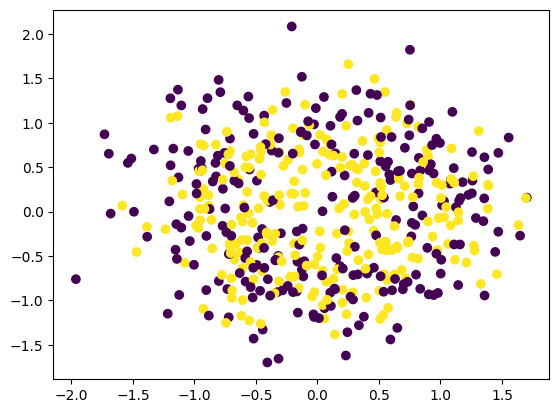

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree=DecisionTreeClassifier(random_state=42)

In [8]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

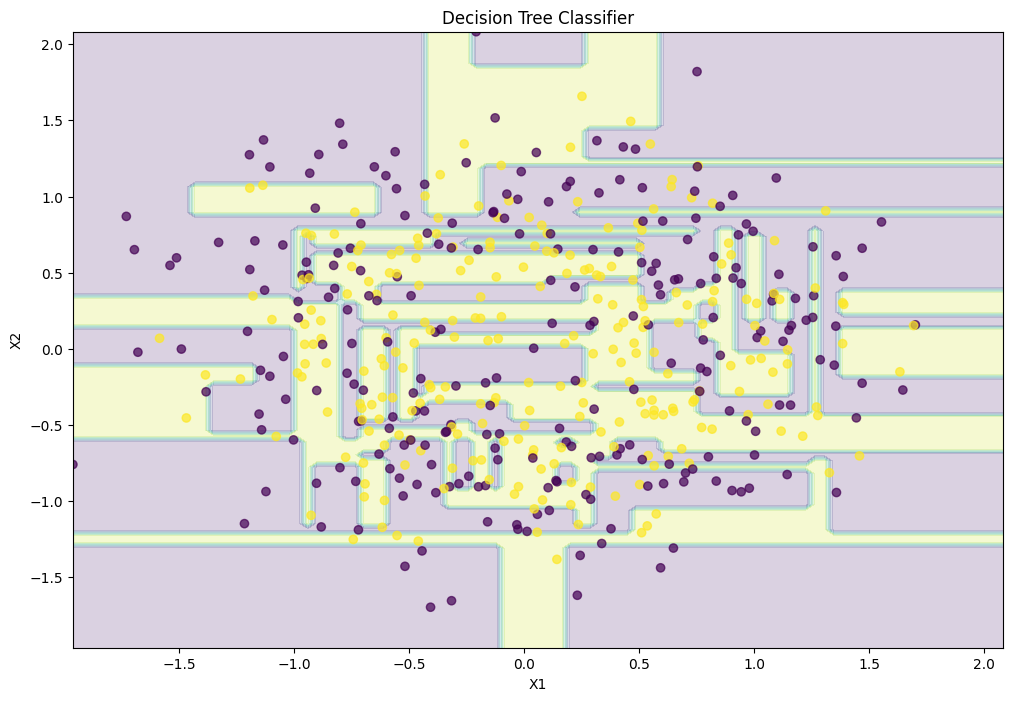

In [11]:
plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Tree Classifier')
plt.show()

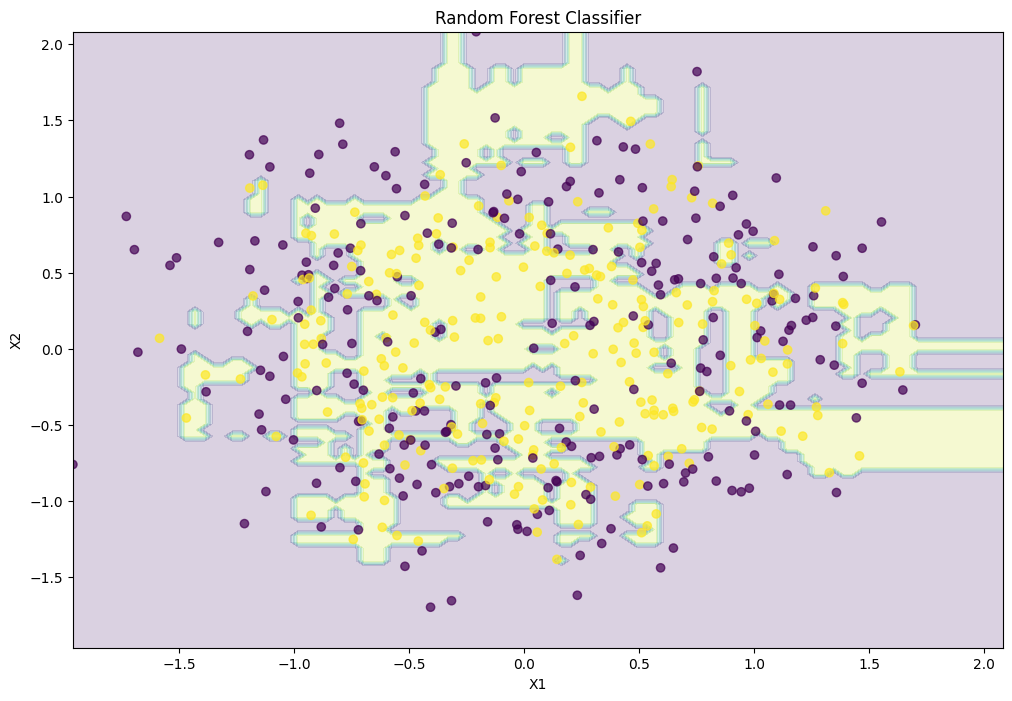

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Forest Classifier')
plt.show()

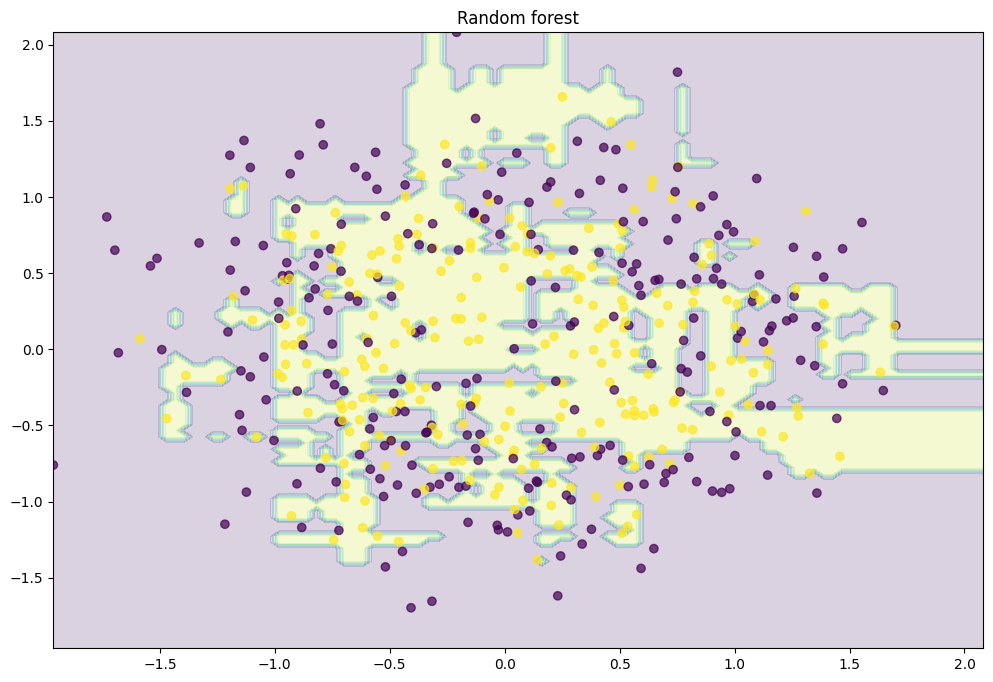

In [17]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [18]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


(-5.0, 5.0)

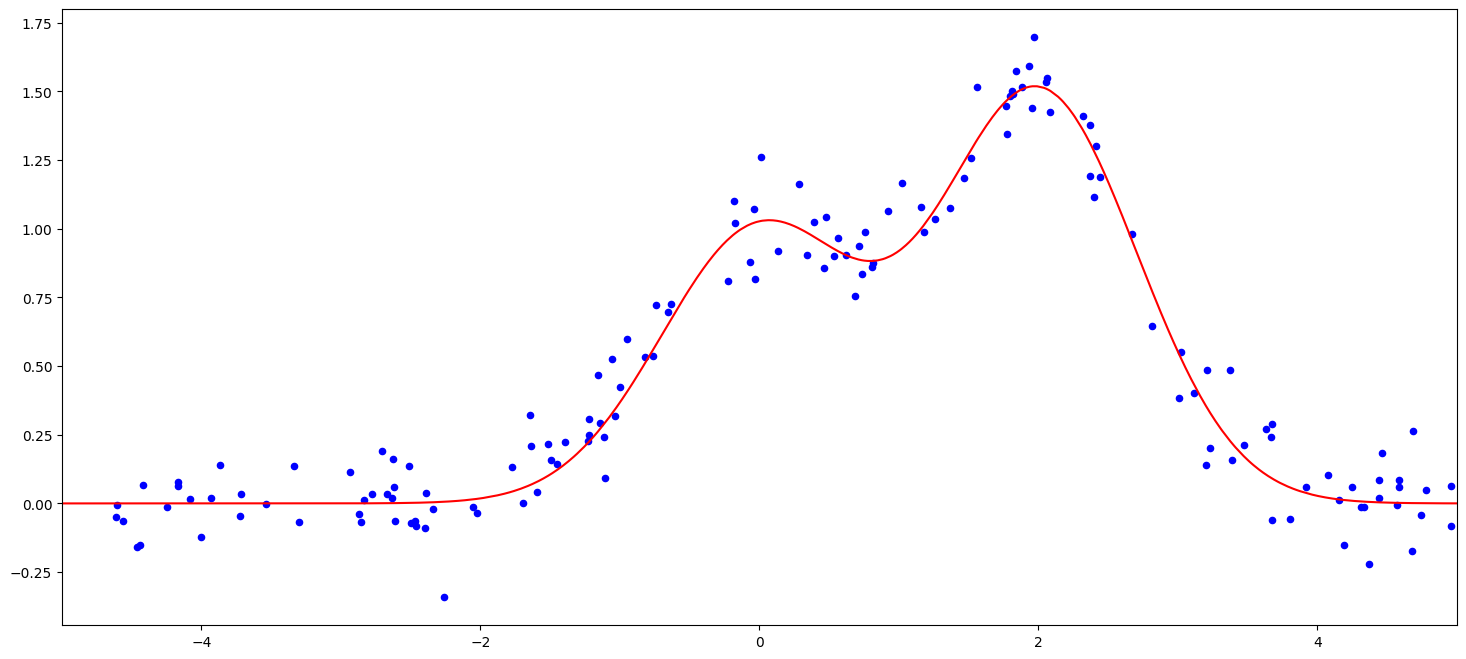

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

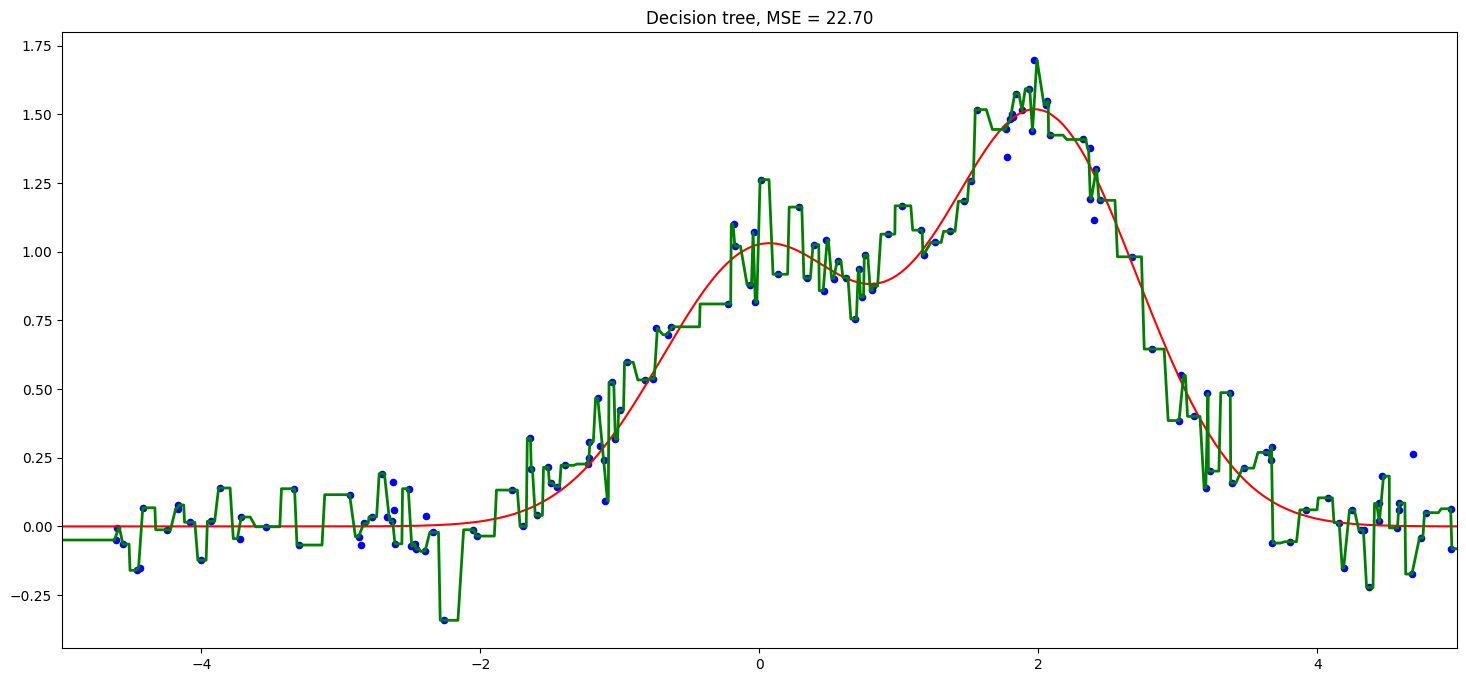

In [20]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

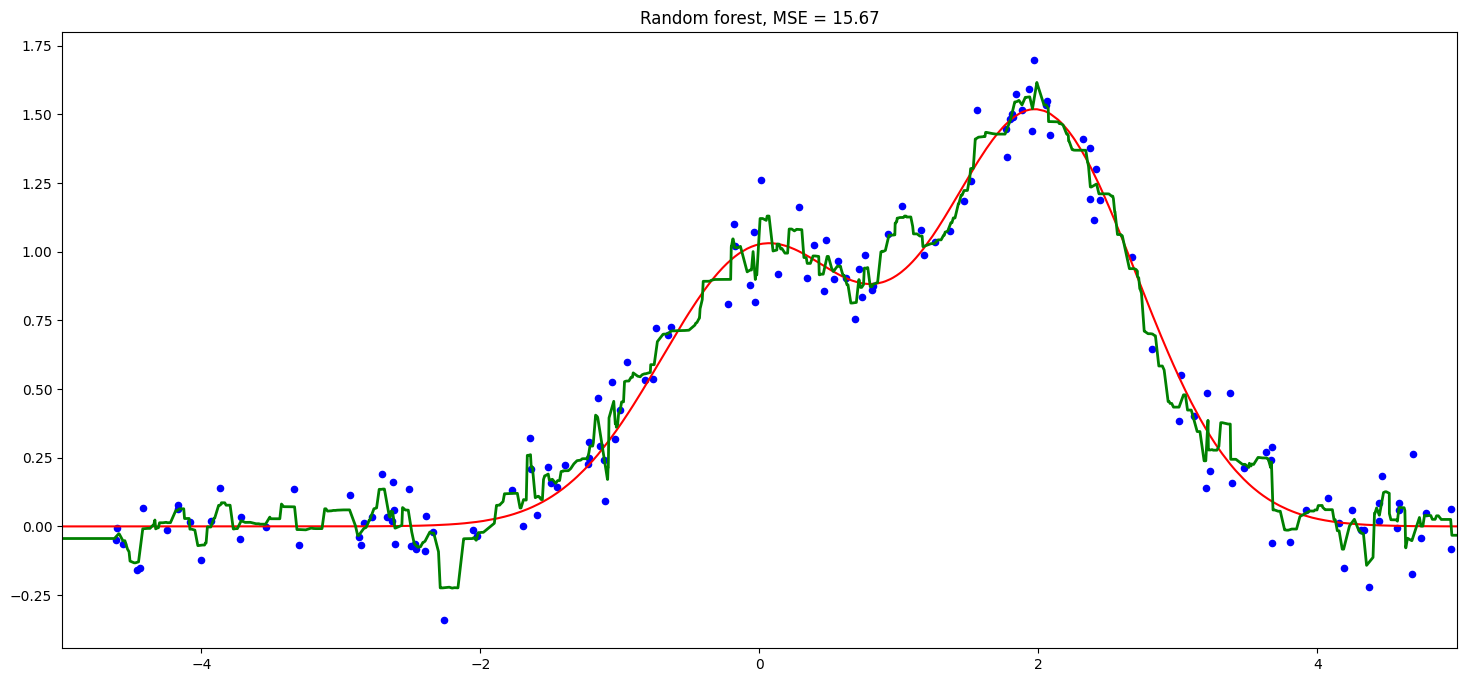

In [23]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Use X_train and y_train, which were generated for regression
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r") # Use X_test for plotting
plt.scatter(X_train, y_train, c="b", s=20) # Use X_train for plotting
plt.plot(X_test, rf_predict, "g", lw=2) # Use X_test for plotting
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));